In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\zhida\Desktop\data.csv")
print(df.columns)
print(df.info())

df.columns=df.columns.str.lower().str.replace(' ','_')
print(df.columns)

duplicated=df[df.duplicated()]
print(duplicated.shape)
df=df.drop_duplicates().reset_index(drop=True)
print(df.shape)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       1191

In [2]:
df['engine_fuel_type']=df['engine_fuel_type'].fillna('regular unleaded')
df['engine_hp']=df['engine_hp'].fillna(df['engine_hp'].mean().round())
df['engine_cylinders']=df['engine_cylinders'].fillna(df['engine_cylinders'].mean().round())
df['number_of_doors']=df['number_of_doors'].fillna(4)
df=df.drop('market_category',axis=1).reset_index(drop=True)
df=df.drop('model',axis=1).reset_index(drop=True)

In [3]:
df1=df.copy()
print(df1.dtypes[df1.dtypes=='object'])
print(df1.nunique())
print(df1.info())

make                 object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
vehicle_size         object
vehicle_style        object
dtype: object
make                   48
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11199 non-null  object 
 1   year               11199 non-null  int64  
 2   engine_fuel_type   11199 non-null  object 
 3   engine_hp          11199 non-null  float64
 4   engine_cylinders   11199 non-null  floa

                            msrp  popularity
make          year                          
Mazda         1995   3367.800000           5
              2006  26300.000000           5
Nissan        1998   3434.400000           5
Mercedes-Benz 1990   2147.000000           5
Acura         2006  21849.000000           5
...                          ...         ...
Volkswagen    2015  29460.909091         165
Toyota        2015  33205.389222         167
              2016  33715.357143         182
Chevrolet     2016  35996.528497         193
              2015  35706.092233         206

[392 rows x 2 columns]


[Text(0.5, 1.0, 'Popularity and Msrp by Make and Year')]

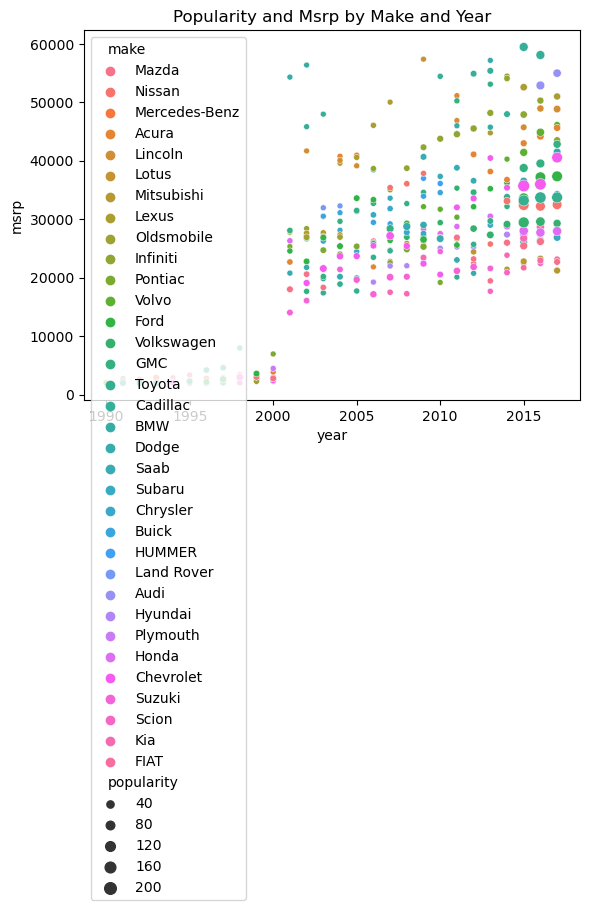

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
mean_make_year = df1.groupby(['make','year']).agg({'msrp':'mean','popularity':'count'}).sort_values(by='popularity')
mean_make_year= mean_make_year[mean_make_year['popularity']>=5]
mean_make_year=mean_make_year[mean_make_year['msrp']<60000]
print(mean_make_year)

sns.scatterplot(x='year',y='msrp',size='popularity',hue='make',data=mean_make_year).set(title='Popularity and Msrp by Make and Year')


c:\Users\zhida\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Msrp Hist Distribution')]

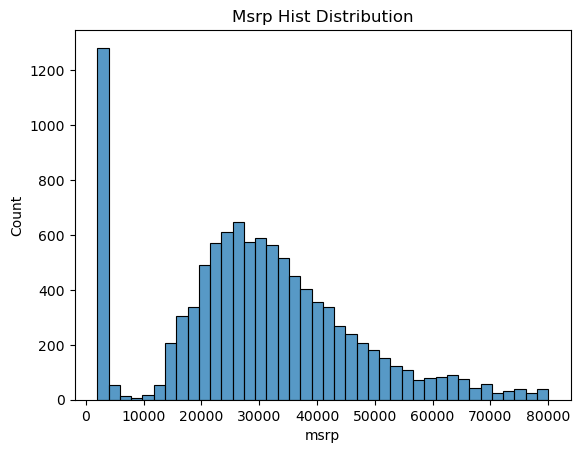

In [5]:
sns.histplot(x=df1.msrp[df1.msrp<80000],bins=40).set(title='Msrp Hist Distribution')


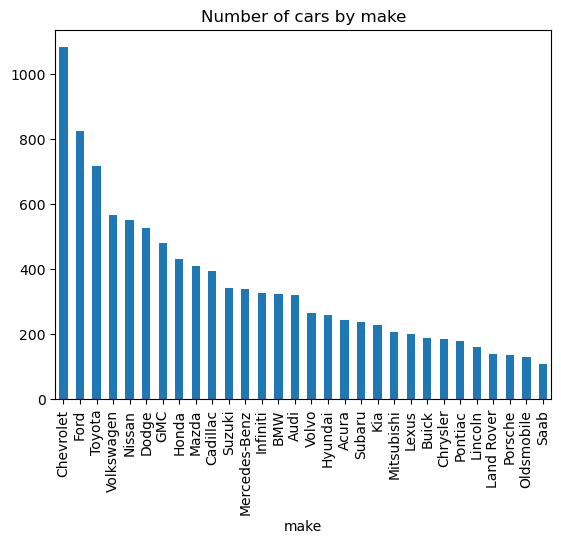

In [6]:
df1.make.value_counts().nlargest(30).plot(kind='bar')
plt.title('Number of cars by make')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import math 
from sklearn.metrics import mean_squared_error
df1=pd.get_dummies(df1,prefix='',prefix_sep='',drop_first=True)
X=df1.drop('msrp',axis=1)
y=df1['msrp']
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.3)

print(X_train.shape,X_test.shape)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
lasso=Lasso(alpha=0.1).fit(X_train,y_train)
ridge=Ridge().fit(X_train,y_train)
y_pred=ridge.predict(X_test)
print(lasso.score(X_test, y_test),ridge.score(X_test,y_test))
print('R2:',r2_score(y_test,y_pred))


(7839, 87) (3360, 87)
0.9007483520091253 0.8071205999009314
R2: 0.8071205999009314


c:\Users\zhida\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.123e+09, tolerance: 2.866e+09
  model = cd_fast.enet_coordinate_descent(


In [8]:
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)

print('R2 Score:',r2_score(y_test,rf_pred))
importance=pd.DataFrame({'feature':X_train.columns,'importance':rf.feature_importances_}).sort_values('importance',ascending=False)
print(importance[importance['importance']>0.03])


R2 Score: 0.9236985023721411
            feature  importance
1         engine_hp    0.492512
2  engine_cylinders    0.176767
5          city_mpg    0.084022
6        popularity    0.045658
0              year    0.035050


In [9]:
import numpy as np
make_list=list(df['make'].unique())
make_list.remove('Acura')

print(make_list)
print(len(make_list))
score={}
for idx, make in enumerate(make_list):
    a=df1[df1[make]==True]
    b=a.drop('msrp',axis=1)
    c=a['msrp']
    pred=rf.predict(b)
    r2=r2_score(c,pred)
    score[make_list[idx]]=r2
    score_df=pd.DataFrame({'make':[make],'r2_score':[r2]}).reset_index(drop=True).sort_values(by='r2_score',ascending=True)
    
print(score)
#df3=pd.DataFrame.from_dict(score,orient='index')
df3=pd.DataFrame(list(score.items()),columns=['make','r2']).sort_values(by='r2',ascending=True)
print(df3)
    


['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan', 'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota', 'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC', 'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford', 'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini', 'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover', 'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla', 'Bugatti']
47
{'BMW': 0.9736047469185054, 'Audi': 0.992485182946817, 'FIAT': 0.7959405910683957, 'Mercedes-Benz': 0.9742035645459844, 'Chrysler': 0.9551282302987492, 'Nissan': 0.9664824656089065, 'Volvo': 0.9870673481417981, 'Mazda': 0.9673321596507451, 'Mitsubishi': 0.9476333020209308, 'Ferrari': 0.7602572624647796, 'Alfa Romeo': -0.911334361345506, 'Toyota': 0.9428813466948882, 'McLaren': 0.6694812579524178, 'Maybach': 0.9597617819011917, 'Pontiac': 0.9422473544479744, 'Porsche': 0.99345125697

According to r2 score, the Bugatti, Alfa Romeo, Spyker seems have overpriced. 